In [1]:
import ROOT
import uproot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/08


In [40]:
sig_df = pd.read_pickle('Pkl_ips/SC_SUSY_227_5_mchi_60_all.pkl')
tt_df  = pd.read_pickle('Pkl_ips/SC_ttbar_all.pkl')
vv_df  = pd.read_pickle('Pkl_ips/SC_VV_all.pkl')
st_df  = pd.read_pickle('Pkl_ips/SC_ST_all.pkl')
sat_df = pd.read_pickle('Pkl_ips/SC_SAT_all.pkl')

In [24]:
selected_columns = [ 'c_kk',  'c_kr',  'c_rk',  'c_nn',  'c_nk',  'c_kn',  'c_rr',  'c_rn',  'c_nr',  
                     'bP_kk', 'bM_kk', 'bP_rr', 'bM_rr', 'bP_nn', 'bM_nn',
                     'llbar_dphi', 'llbar_deta', 'c_hel']

In [25]:
sig_df = sig_df[selected_columns]
tt_df  = tt_df[selected_columns]
st_df  = st_df[selected_columns]
sat_df = sat_df[selected_columns]
vv_df  = vv_df[selected_columns]

In [26]:
root_file = uproot.open('Root_files/SUSY_227_5_60.root')['Step8']
sc_weight = root_file['sc_weight'].array() 

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.
Glyph 8722 m

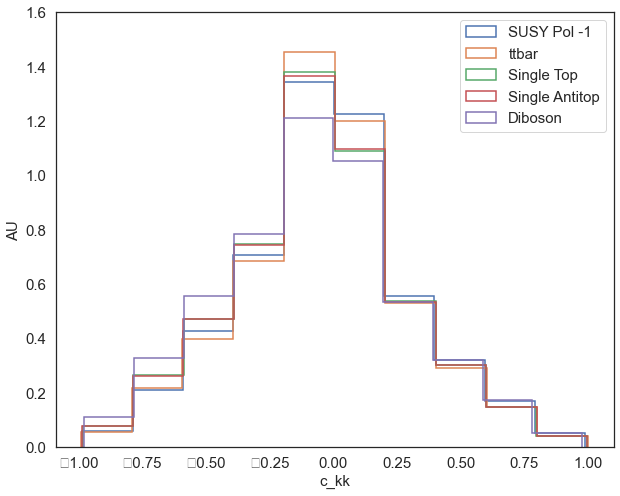

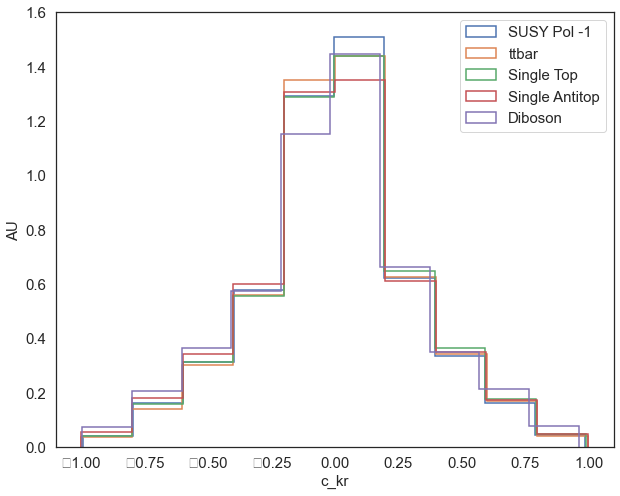

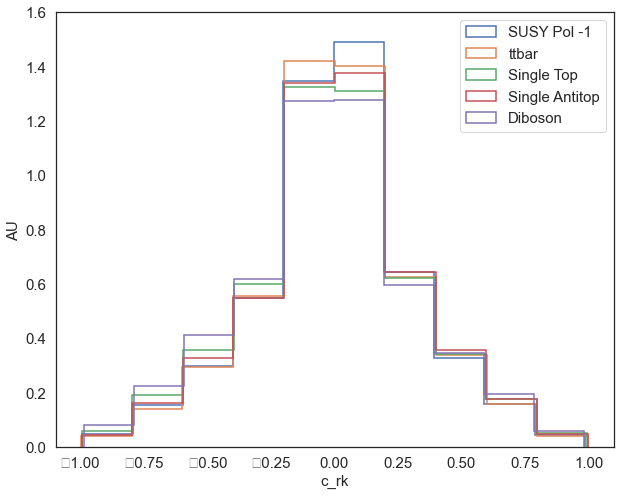

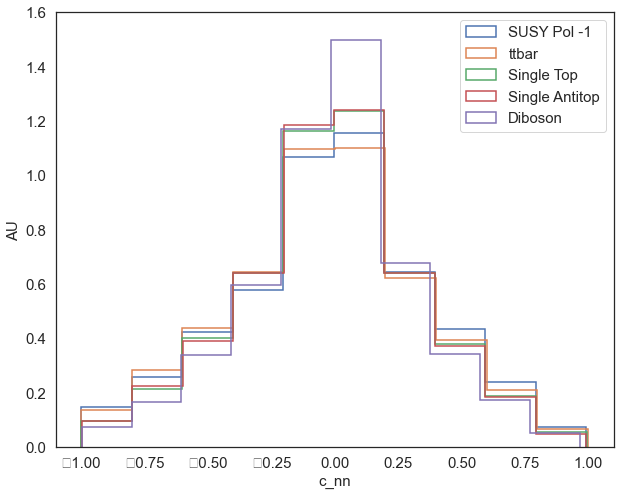

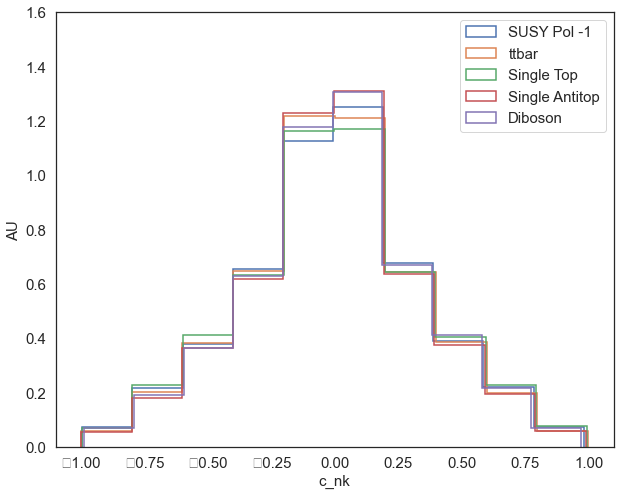

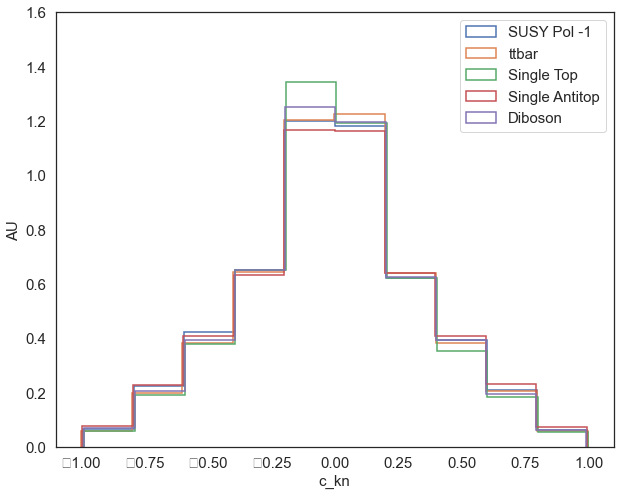

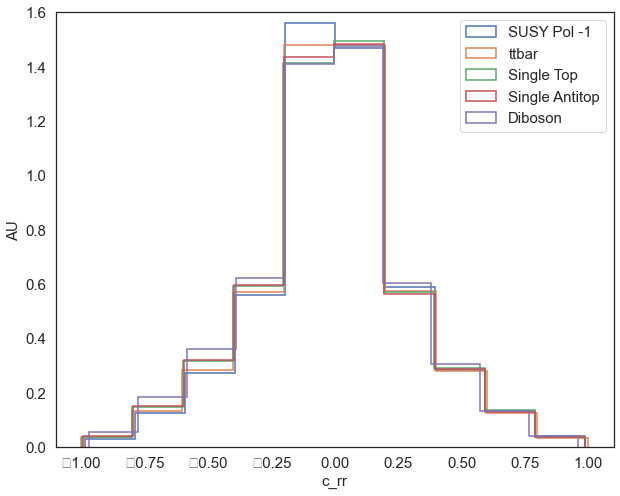

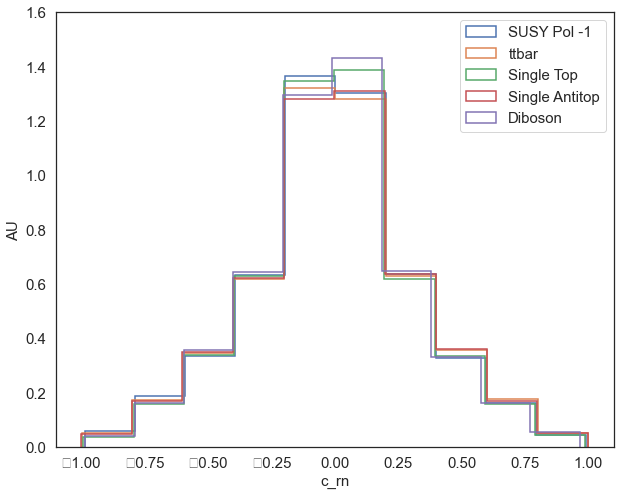

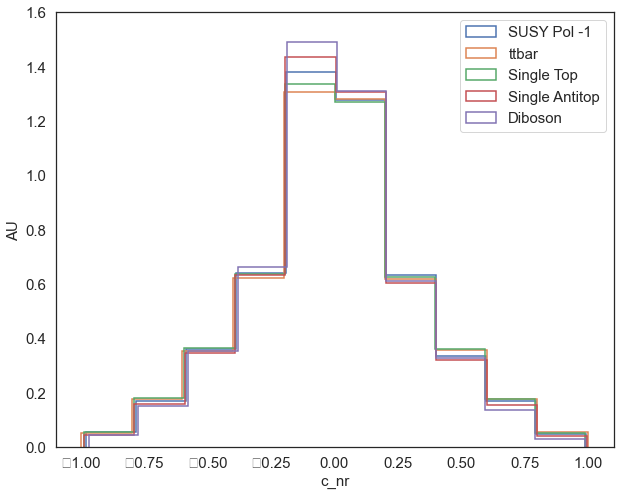

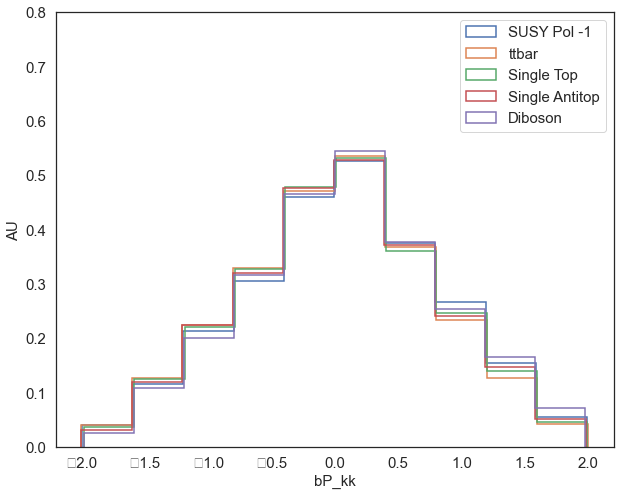

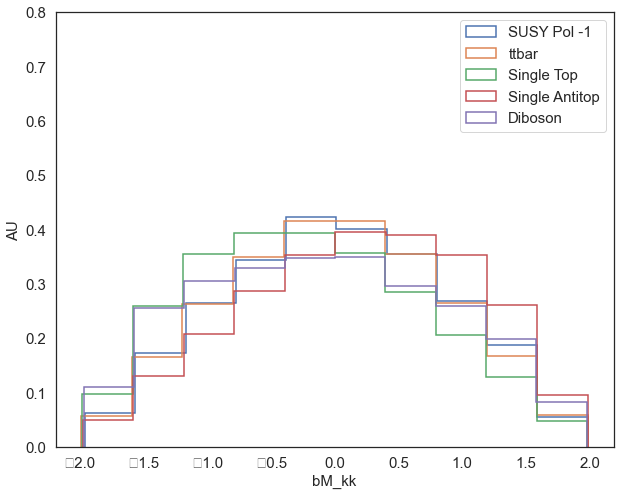

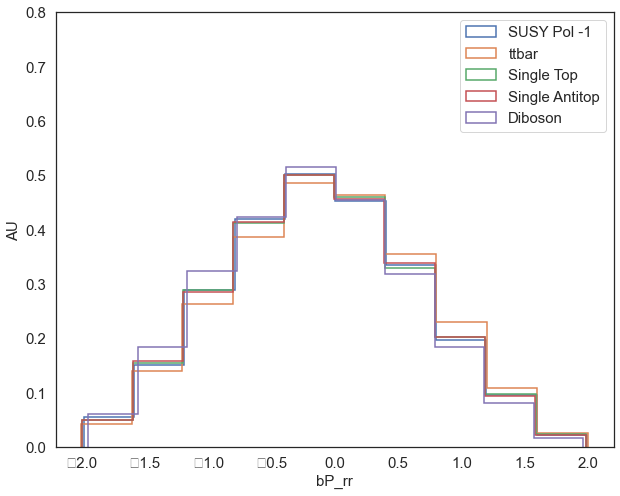

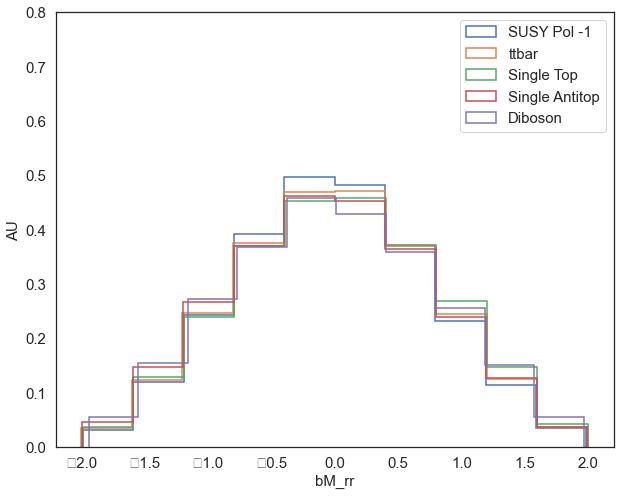

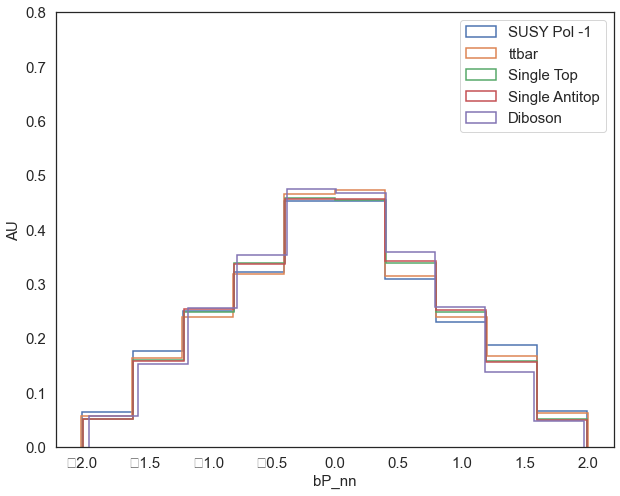

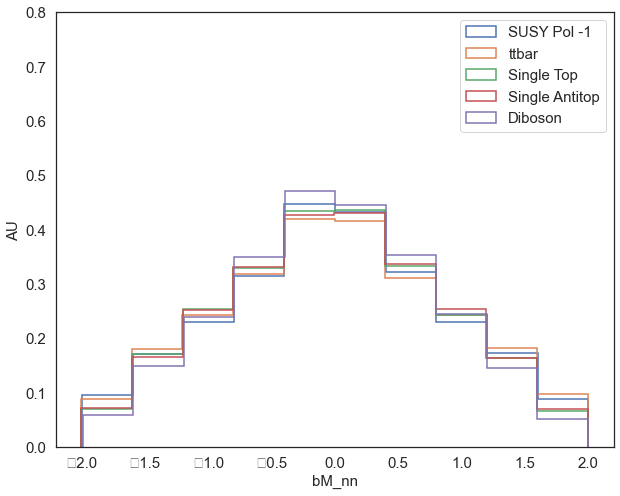

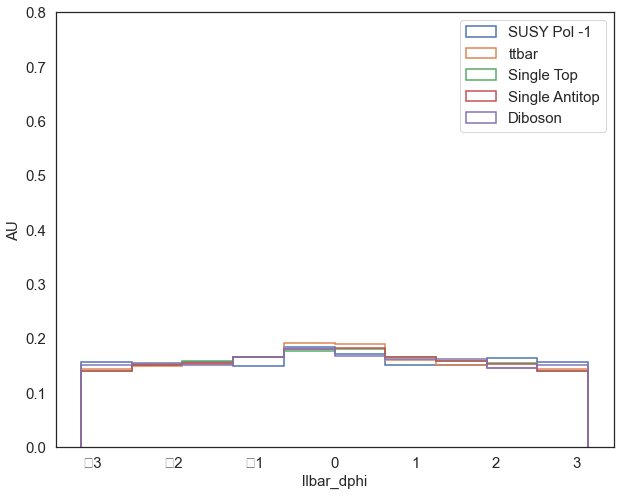

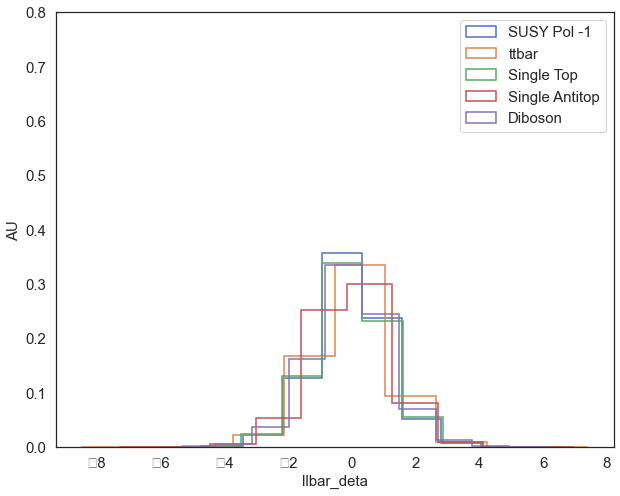

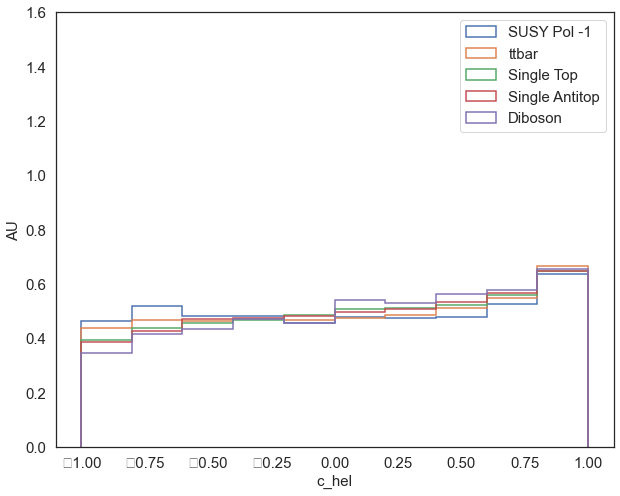

In [17]:
x_labels = sig_df.columns
count    = 0

for i in sig_df.columns :
    plt.figure(figsize=(10,8))
    # Plot the histograms
    plt.hist(sig_df[i], histtype='step', density=True, linewidth=1.5, label='SUSY Pol -1', weights=sc_weight)
    plt.hist(tt_df[i] , histtype='step', density=True, linewidth=1.5, label='ttbar')
    plt.hist(st_df[i] , histtype='step', density=True, linewidth=1.5, label='Single Top')
    plt.hist(sat_df[i], histtype='step', density=True, linewidth=1.5, label='Single Antitop')
    plt.hist(vv_df[i] , histtype='step', density=True, linewidth=1.5, label='Diboson')
    
    # Formatting
    if 'c' in x_labels[count] :
        plt.ylim(0,1.6)
    else :
        plt.ylim(0,0.8)
    plt.xlabel(x_labels[count], fontsize=15)
    plt.ylabel('AU', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)
    
    img_name = 'Images/Mstop_227_5_' + str(x_labels[count]) + '.jpg' 
    count   += 1
    plt.savefig(img_name)

In [19]:
# Lumi weights
w_tt  = 17.994815 * np.ones(len(tt_df))
w_st  = 8.706901  * np.ones(len(st_df))
w_sat = 8.706901  * np.ones(len(sat_df))
w_vv  = 2.580743  * np.ones(len(vv_df))
w_SUSY= 14.38951  * np.ones(len(sig_df))

In [20]:
w_SUSY = np.multiply(np.array(sc_weight), w_SUSY)

In [41]:
# Set both to equal sizes 
# Reducing the bkg dataframe size

sig_df_train = sig_df[1:13000]
tt_df_train  = tt_df[1:20000]
st_df_train  = st_df[1:5000]
vv_df_train  = vv_df[1:2000]
sat_df_train = sat_df[1:5000]

In [42]:
sig_df_wt    = w_SUSY[1:13000]
tt_df_wt     = w_tt[1:20000]
st_df_wt     = w_st[1:5000]
vv_df_wt     = w_vv[1:2000]
sat_df_wt    = w_sat[1:5000]

In [43]:
# Standardize
sig_mean = sig_df_train.mean()
sig_std  = sig_df_train.std()

tt_mean = tt_df_train.mean()
tt_std  = tt_df_train.std()

st_mean = st_df_train.mean()
st_std  = st_df_train.std()

vv_mean = vv_df_train.mean()
vv_std  = vv_df_train.std()

sat_mean = sat_df_train.mean()
sat_std  = sat_df_train.std()

sig_df_train = (sig_df_train - sig_mean)/ sig_std
tt_df_train  = (tt_df_train  - tt_mean)/ tt_std
st_df_train  = (st_df_train  - st_mean)/ st_std
vv_df_train  = (vv_df_train  - vv_mean)/ vv_std
sat_df_train = (sat_df_train  - sat_mean)/ sat_std

In [44]:
bkgList = [tt_df_train, st_df_train, sat_df_train, vv_df_train]  # List of your dataframes
bkgWts  = [tt_df_wt   , st_df_wt   , sat_df_wt   , vv_df_wt]

bkg_df_train = pd.concat(bkgList)
bkg_df_wt    = np.concatenate(bkgWts)

signal = sig_df_train.values
bkg    = bkg_df_train.values

sig_label = np.ones(len(signal))
bkg_label = np.zeros(len(bkg))

data      = np.concatenate((signal,bkg))
label     = np.concatenate((sig_label,bkg_label))
sample_wts= np.concatenate((sig_df_wt, bkg_df_wt))

In [45]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True)
skf.get_n_splits(data, label)
skf.split(data, label)

<generator object _BaseKFold.split at 0x7f2d30fbd5f0>

In [46]:
for train_index, test_index in skf.split(data, label):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = label[train_index], label[test_index]
    x_train_wt, x_test_wt = sample_wts[train_index], sample_wts[test_index]

TRAIN: [    0     2     5 ... 44991 44993 44994] TEST: [    1     3     4 ... 44986 44989 44992]
TRAIN: [    1     3     4 ... 44986 44989 44992] TEST: [    0     2     5 ... 44991 44993 44994]


In [47]:
idx      = np.random.permutation(len(x_train))
x_train  = x_train[idx]
y_train  = y_train[idx]
x_train_wt = x_train_wt[idx]

In [50]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout , BatchNormalization
from skopt        import gp_minimize

model = Sequential()
model.add(Dense(150, input_dim = 39 ,activation='relu'))
model.add(Dropout(0.3))
#model.add(BatchNormalization())
#model.add(Dense(100, input_dim = 100 ,activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 150)               6000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 151       
Total params: 6,151
Trainable params: 6,151
Non-trainable params: 0
_________________________________________________________________


In [51]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [52]:
hist = model.fit(x_train, y_train, sample_weight=x_train_wt, batch_size=50, epochs=1000,verbose=1, shuffle=True, validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
                  ModelCheckpoint(filepath='model2.h5', verbose=0)])

Epoch 1/1000
360/360 [==============================] - 1s 2ms/step - loss: 8.7598 - accuracy: 0.6782 - val_loss: 8.1720 - val_accuracy: 0.7107
Epoch 2/1000
360/360 [==============================] - 0s 1ms/step - loss: 8.3803 - accuracy: 0.7054 - val_loss: 8.1727 - val_accuracy: 0.7107
Epoch 3/1000
360/360 [==============================] - 0s 1ms/step - loss: 8.3850 - accuracy: 0.7053 - val_loss: 8.1417 - val_accuracy: 0.7107
Epoch 4/1000
360/360 [==============================] - 0s 1ms/step - loss: 8.2141 - accuracy: 0.7089 - val_loss: 8.1010 - val_accuracy: 0.7107
Epoch 5/1000
360/360 [==============================] - 0s 1ms/step - loss: 8.2761 - accuracy: 0.7074 - val_loss: 8.1034 - val_accuracy: 0.7102
Epoch 6/1000
360/360 [==============================] - 0s 1ms/step - loss: 8.2249 - accuracy: 0.7117 - val_loss: 8.0763 - val_accuracy: 0.7107
Epoch 7/1000
360/360 [==============================] - 0s 1ms/step - loss: 8.0088 - accuracy: 0.7056 - val_loss: 8.0569 - val_accuracy:

360/360 [==============================] - 0s 1ms/step - loss: 6.9791 - accuracy: 0.7242 - val_loss: 6.8262 - val_accuracy: 0.7240
Epoch 58/1000
360/360 [==============================] - 0s 1ms/step - loss: 6.9542 - accuracy: 0.7253 - val_loss: 6.8597 - val_accuracy: 0.7231
Epoch 59/1000
360/360 [==============================] - 0s 1ms/step - loss: 6.9553 - accuracy: 0.7234 - val_loss: 6.8342 - val_accuracy: 0.7211
Epoch 60/1000
360/360 [==============================] - 0s 1ms/step - loss: 6.9794 - accuracy: 0.7219 - val_loss: 6.7545 - val_accuracy: 0.7258
Epoch 61/1000
360/360 [==============================] - 0s 1ms/step - loss: 6.7714 - accuracy: 0.7318 - val_loss: 6.8069 - val_accuracy: 0.7178
Epoch 62/1000
360/360 [==============================] - 0s 1ms/step - loss: 6.8346 - accuracy: 0.7338 - val_loss: 6.6771 - val_accuracy: 0.7251
Epoch 63/1000
360/360 [==============================] - 0s 1ms/step - loss: 6.8354 - accuracy: 0.7274 - val_loss: 6.8206 - val_accuracy: 0.7144

360/360 [==============================] - 0s 1ms/step - loss: 5.4623 - accuracy: 0.7698 - val_loss: 5.1381 - val_accuracy: 0.7833
Epoch 114/1000
360/360 [==============================] - 0s 1ms/step - loss: 5.3825 - accuracy: 0.7785 - val_loss: 5.2216 - val_accuracy: 0.7758
Epoch 115/1000
360/360 [==============================] - 0s 1ms/step - loss: 5.4399 - accuracy: 0.7789 - val_loss: 5.1435 - val_accuracy: 0.7791
Epoch 116/1000
360/360 [==============================] - 0s 1ms/step - loss: 5.4350 - accuracy: 0.7830 - val_loss: 5.0765 - val_accuracy: 0.7876
Epoch 117/1000
360/360 [==============================] - 0s 1ms/step - loss: 5.4494 - accuracy: 0.7791 - val_loss: 5.0068 - val_accuracy: 0.7882
Epoch 118/1000
360/360 [==============================] - 0s 1ms/step - loss: 5.1560 - accuracy: 0.7846 - val_loss: 5.0520 - val_accuracy: 0.7898
Epoch 119/1000
360/360 [==============================] - 0s 1ms/step - loss: 5.2650 - accuracy: 0.7756 - val_loss: 4.9733 - val_accuracy: 

360/360 [==============================] - 0s 1ms/step - loss: 4.3177 - accuracy: 0.8214 - val_loss: 3.7185 - val_accuracy: 0.8467
Epoch 170/1000
360/360 [==============================] - 0s 1ms/step - loss: 4.2675 - accuracy: 0.8197 - val_loss: 3.5631 - val_accuracy: 0.8593
Epoch 171/1000
360/360 [==============================] - 0s 1ms/step - loss: 4.1887 - accuracy: 0.8270 - val_loss: 3.6915 - val_accuracy: 0.8482
Epoch 172/1000
360/360 [==============================] - 0s 1ms/step - loss: 4.1674 - accuracy: 0.8304 - val_loss: 3.6830 - val_accuracy: 0.8431
Epoch 173/1000
360/360 [==============================] - 0s 1ms/step - loss: 4.1681 - accuracy: 0.8302 - val_loss: 3.6744 - val_accuracy: 0.8482
Epoch 174/1000
360/360 [==============================] - 0s 1ms/step - loss: 4.1559 - accuracy: 0.8231 - val_loss: 3.6363 - val_accuracy: 0.8496
Epoch 175/1000
360/360 [==============================] - 0s 1ms/step - loss: 4.0782 - accuracy: 0.8283 - val_loss: 3.5146 - val_accuracy: 

360/360 [==============================] - 0s 1ms/step - loss: 3.3829 - accuracy: 0.8643 - val_loss: 2.6818 - val_accuracy: 0.8936
Epoch 226/1000
360/360 [==============================] - 0s 1ms/step - loss: 3.1597 - accuracy: 0.8710 - val_loss: 2.6072 - val_accuracy: 0.9058
Epoch 227/1000
360/360 [==============================] - 0s 1ms/step - loss: 3.3406 - accuracy: 0.8592 - val_loss: 2.6705 - val_accuracy: 0.9024
Epoch 228/1000
360/360 [==============================] - 0s 1ms/step - loss: 3.3476 - accuracy: 0.8586 - val_loss: 2.6816 - val_accuracy: 0.8967
Epoch 229/1000
360/360 [==============================] - 0s 1ms/step - loss: 3.2760 - accuracy: 0.8653 - val_loss: 2.6254 - val_accuracy: 0.9049
Epoch 230/1000
360/360 [==============================] - 0s 1ms/step - loss: 3.2662 - accuracy: 0.8622 - val_loss: 2.6010 - val_accuracy: 0.9056
Epoch 231/1000
360/360 [==============================] - 0s 1ms/step - loss: 3.1913 - accuracy: 0.8605 - val_loss: 2.6563 - val_accuracy: 

360/360 [==============================] - 0s 1ms/step - loss: 2.6019 - accuracy: 0.8912 - val_loss: 1.9918 - val_accuracy: 0.9282
Epoch 282/1000
360/360 [==============================] - 0s 1ms/step - loss: 2.5846 - accuracy: 0.8947 - val_loss: 1.9625 - val_accuracy: 0.9322
Epoch 283/1000
360/360 [==============================] - 0s 1ms/step - loss: 2.7520 - accuracy: 0.8890 - val_loss: 2.0091 - val_accuracy: 0.9304
Epoch 284/1000
360/360 [==============================] - 0s 1ms/step - loss: 2.5281 - accuracy: 0.8979 - val_loss: 1.9413 - val_accuracy: 0.9298
Epoch 285/1000
360/360 [==============================] - 0s 1ms/step - loss: 2.6637 - accuracy: 0.8911 - val_loss: 2.0126 - val_accuracy: 0.9256
Epoch 286/1000
360/360 [==============================] - 0s 1ms/step - loss: 2.6157 - accuracy: 0.8916 - val_loss: 1.9886 - val_accuracy: 0.9304
Epoch 287/1000
360/360 [==============================] - 0s 1ms/step - loss: 2.5266 - accuracy: 0.8950 - val_loss: 1.9387 - val_accuracy: 

In [23]:
# serialize model to JSON
model_json = model.to_json()
with open("Models/Mstop_227_5_mchi_60.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Models/Mstop_227_5_mchi_60.h5")
print("Saved model to disk")

Saved model to disk


In [41]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch', fontsize=17)
    plt.ylabel('Loss' , fontsize=17)
    plt.tick_params(axis="y", labelsize=15)
    plt.tick_params(axis="x", labelsize=15)
    plt.title('Cross Entropy Loss by Epoch', fontsize=17)
    color='C0'
    do_acc=False
    for label,loss in histories:
        #color = tuple(np.random.random(3))
        #colors.append(color)
        l = 'Training set loss'
        vl= 'Validation set loss'
        if 'accuracy' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['accuracy'][-1])
            do_acc = True
        if 'val_accuracy' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_accuracy'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color='C0')
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color='C0')

    plt.legend(fontsize=17)
    #plt.yscale('log')
    plt.show()
    
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch', fontsize=17)
    plt.ylabel('Accuracy' , fontsize=17)
    plt.tick_params(axis="y", labelsize=15)
    plt.tick_params(axis="x", labelsize=15)
    for i,(label,loss) in enumerate(histories):
        #color = colors[i]
        if 'accuracy' in loss.history:
            plt.plot(loss.history['accuracy'], lw=2, label=label+" accuracy", color=color)
        if 'val_accuracy' in loss.history:
            plt.plot(loss.history['val_accuracy'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(fontsize=17)
    plt.show()

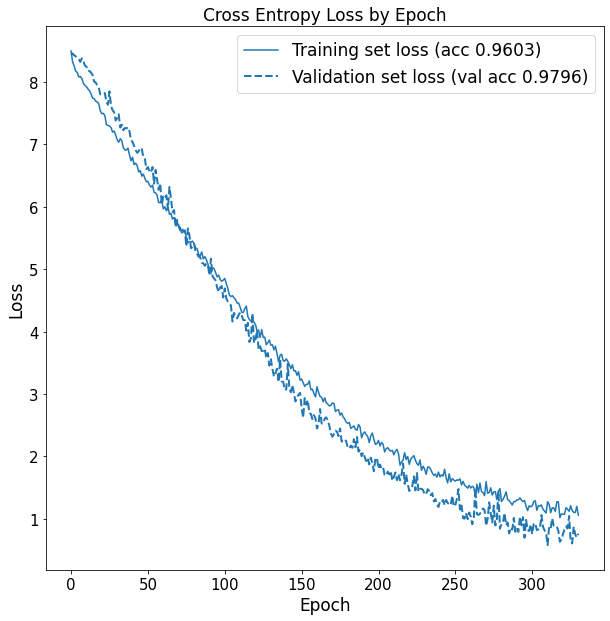

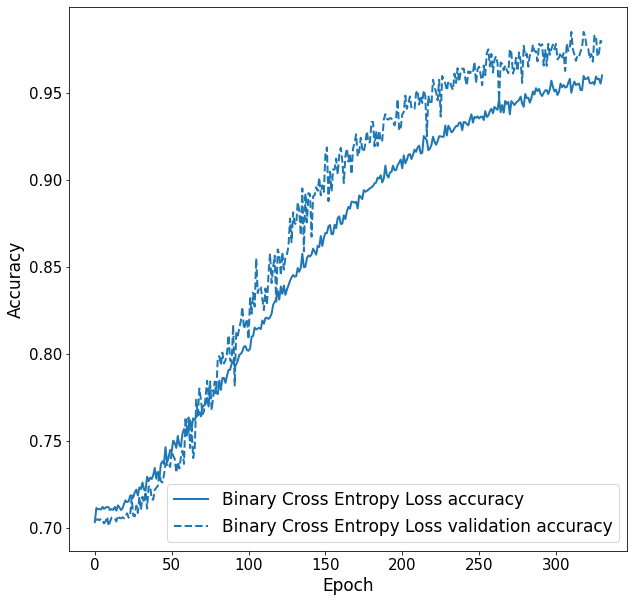

In [52]:
show_losses( [("Binary Cross Entropy Loss", hist)])

In [53]:
from sklearn.metrics import roc_curve
y_pred_train = model.predict(x_train).ravel()
y_pred_test  = model.predict(x_test).ravel()

fpr_keras_train, tpr_keras_train, thresholds_keras = roc_curve(y_train, y_pred_train)
fpr_keras_test , tpr_keras_test , thresholds_keras = roc_curve(y_test , y_pred_test)

In [54]:
from sklearn.metrics import auc
auc_keras_test  = auc(fpr_keras_test, tpr_keras_test)
auc_keras_train = auc(fpr_keras_train, tpr_keras_train)

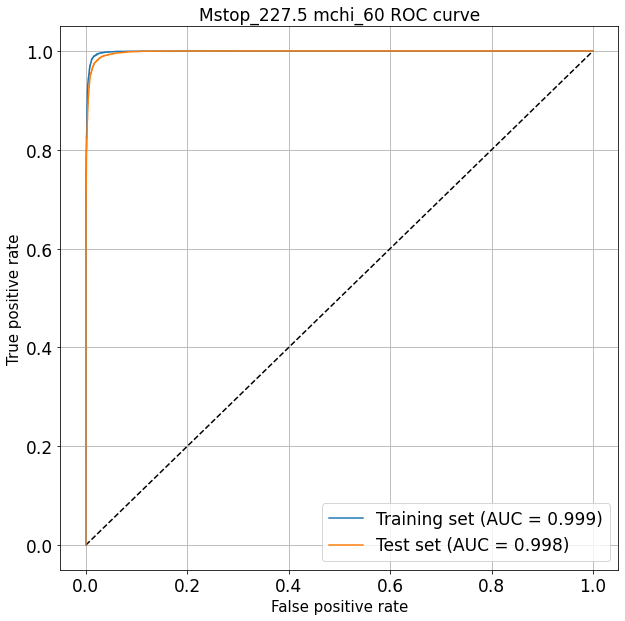

In [55]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_train, tpr_keras_train, label='Training set (AUC = {:.3f})'.format(auc_keras_train))
plt.plot(fpr_keras_test , tpr_keras_test , label='Test set (AUC = {:.3f})'.format(auc_keras_test))
plt.tick_params(axis="y", labelsize=17)
plt.tick_params(axis="x", labelsize=17)
plt.xlabel('False positive rate', fontsize=15)
plt.ylabel('True positive rate' , fontsize=15)
plt.title('Mstop_227.5 mchi_60 ROC curve', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.grid()
#plt.savefig('ROC Mstop 227.5 Mchi 60.jpg')
plt.show()

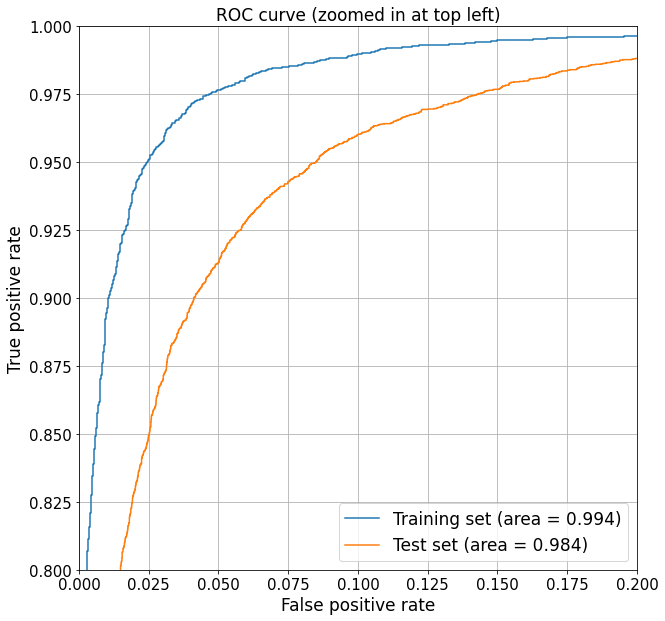

In [22]:
# Zoom in view of the upper left corner.
plt.figure(figsize=(10,10))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_train, tpr_keras_train, label='Training set (area = {:.3f})'.format(auc_keras_train))
plt.plot(fpr_keras_test , tpr_keras_test , label='Test set (area = {:.3f})'.format(auc_keras_test))
plt.ylabel('True positive rate' , fontsize=17)
plt.xlabel('False positive rate', fontsize=17)
plt.tick_params(axis="y", labelsize=15)
plt.tick_params(axis="x", labelsize=15)
plt.title('ROC curve (zoomed in at top left)', fontsize=17)
plt.legend(loc='best', fontsize=17)
plt.grid()
plt.show()

In [46]:
tt_pred  = model.predict(tt_df[20000:]) 
st_pred  = model.predict(st_df[5000:])
sat_pred = model.predict(sat_df[5000:])
vv_pred  = model.predict(vv_df[2000:]) 
si_pred  = model.predict(sig_df[13000:])

2021-05-07 00:43:55.034333: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 366416544 exceeds 10% of free system memory.


In [47]:
tt_pred_wt  = w_tt[20000:]
st_pred_wt  = w_st[5000:]
sat_pred_wt = w_sat[5000:]
vv_pred_wt  = w_vv[2000:]
si_pred_wt  = w_SUSY[13000:]

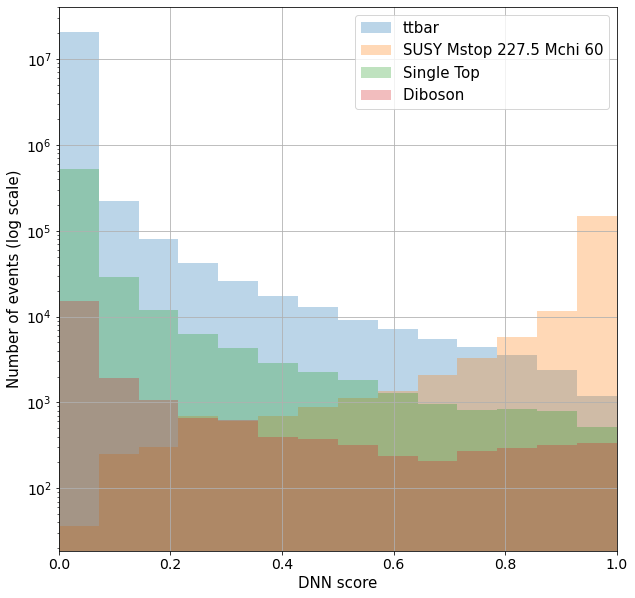

In [59]:
binning = np.linspace(0,1,15)
plt.figure(figsize=(10,10))
plt.tick_params(axis="y", labelsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.hist(tt_pred, bins=binning, alpha=0.3, weights= tt_pred_wt, label='ttbar')
plt.hist(si_pred, bins=binning, alpha=0.3, weights= si_pred_wt, label='SUSY Mstop 227.5 Mchi 60')
plt.hist(st_pred, bins=binning, alpha=0.3, weights= st_pred_wt, label='Single Top')
plt.hist(vv_pred, bins=binning, alpha=0.3, weights= vv_pred_wt, label='Diboson ')
#plt.hist(sat_pred, bins=binning, alpha=0.3, label='Single Antitop')
plt.yscale('log')
plt.xlim(0,1)
plt.xlabel('DNN score', fontsize=15)
plt.ylabel('Number of events (log scale)', fontsize=15)
plt.grid()
plt.legend(loc='best', fontsize=15)
#plt.savefig('DNN_score_Mstop_227_5_Mchi_60.jpg')

In [46]:
np.savetxt('DNN_pred/Mstop_227_5_mchi_60_SUSY_pred.txt', si_pred)
np.savetxt('DNN_pred/Mstop_227_5_mchi_60_tt_pred.txt'  , tt_pred)
np.savetxt('DNN_pred/Mstop_227_5_mchi_60_st_pred.txt'  , st_pred)
np.savetxt('DNN_pred/Mstop_227_5_mchi_60_sat_pred.txt' , sat_pred)
np.savetxt('DNN_pred/Mstop_227_5_mchi_60_vv_pred.txt'  , vv_pred)

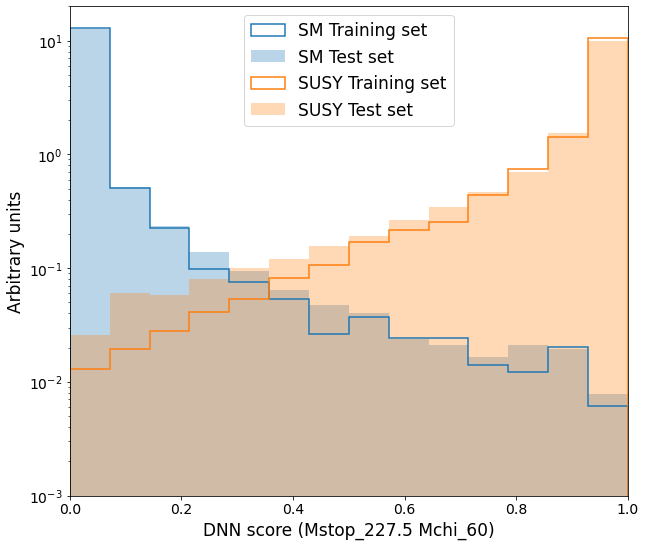

In [60]:
c0 = 'C0'
c1 = 'C1'
plt.figure(figsize=(10,9))
plt.tick_params(axis="y", labelsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.hist(y_pred_train[y_train == 0], bins=binning, label='SM Training set', histtype='step', linestyle='solid', linewidth=1.5, density=True, color=c0)
plt.hist(y_pred_test[y_test == 0]  , bins=binning, label='SM Test set'    , alpha=0.3, linewidth=1.5, density=True , color=c0)
plt.hist(y_pred_train[y_train == 1], bins=binning, label='SUSY Training set', histtype='step' , linestyle='solid', linewidth=1.5, density=True, color=c1)
plt.hist(y_pred_test[y_test == 1]  , bins=binning, label='SUSY Test set ', alpha=0.3, linewidth=1.5, density=True, color=c1)

plt.yscale('log')
plt.ylim(0.001, 20)
plt.xlim(0,1)
plt.xlabel('DNN score (Mstop_227.5 Mchi_60)', fontsize=17)
plt.ylabel('Arbitrary units', fontsize=17)
plt.legend(loc='upper center', fontsize=17)
#plt.savefig('Train vs test Mstop_227.5 Mchi_60.jpg')

In [8]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()
    sns.set(font_scale=1.4)
    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(15, 12))

    # Add diverging colormap from red to blue
    #cmap = sns.diverging_palette(250, 10, as_cmap=True)
    #cmap  = sns.color_palette("coolwarm")
    cmap = sns.diverging_palette(0,255,sep=1, as_cmap=True)
                                 
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        hm = sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, vmin=-1, vmax=1)
        plt.title('Correlation matrix for input features', fontsize=30)
        plt.savefig('ip_features_corr.png')
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, vmin=-1, vmax=1)

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


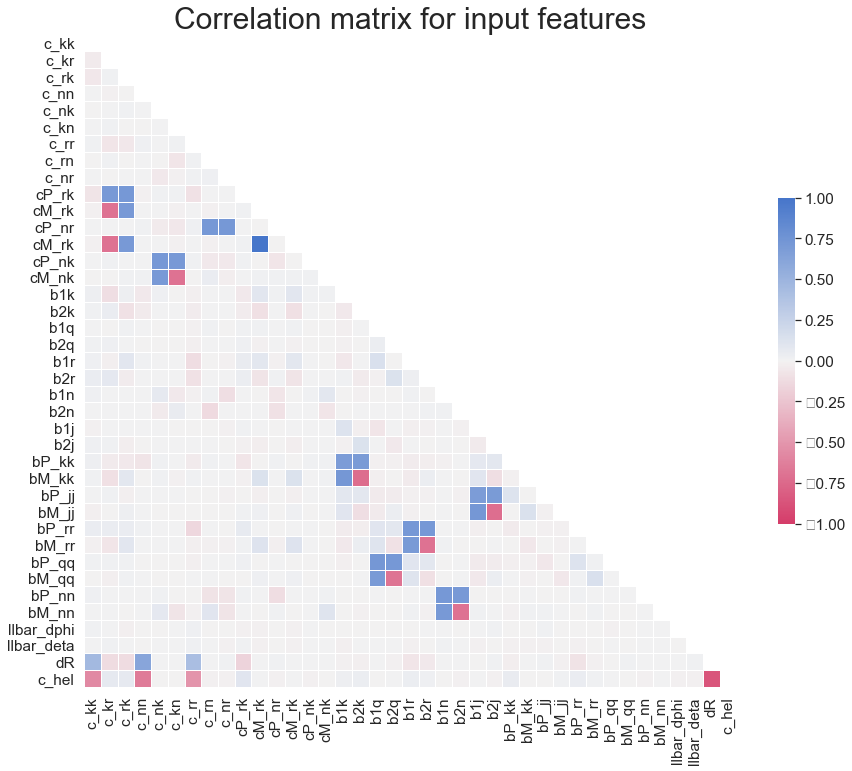

In [53]:
corr = sig_df_train.corr()
CorrMtx(corr, dropDuplicates = True)